# Установка пакетов: pandas, seaborn, sklearn

Pandas: дает возможность строить сводные таблицы, выполнять группировки, предоставляет удобный доступ к табличным данным и при наличии matplotlib дает возможность рисовать графики на полученных наборах данных.

Seaborn: библиотека для создания статистических графиков на Python. Основывается на matplotlib и взаимодействует со структурами данных panda

Sklearn: алгоритмы классификации, регрессии и кластеризации и позволяет взаимодействовать с другими библиотеками численного моделирования - Pandas, NumPy, Scipy.

In [1]:
!pip install pandas

In [2]:
!pip install seaborn

In [3]:
!pip install scikit-learn

# Подключение пакетов

In [4]:
import numpy as np             
import pandas as pd         
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Домашняя работа к 10 ноября

0) Описание задачи:
Задан набор данных о диабете.
Будем использовать имеющиеся данные, чтобы предсказать: есть ли у человека диабет/ нет диабета.

Набор данных содержит информацию о 100000 различных случаях.
В наборе данных использовались следующие признаки:

Имеются данные: пол, возраст, гипертония, заболевание сердца, история курения, ИМТ, уровень HbA1c, уровень глюкозы в крови, диабет. Нужно предсказать есть ли у человека диабет

пол: мужской или женский

возраст: сколько лет (число)

гипертония: есть или нет (логическое значение)

заболевание сердца: есть или нет (логическое значение)

курение: есть или нет (логическое значение)

ИМТ: индекс массы тела (число)

уровень HbA1c: показатель гемоглобина (число)

Уровень глюкозы в крови: показателей глюкозы в крови (число)

Диабет: есть ли диабет (логическое число)

Необходимо по первым 8 признакам предсказать: есть у человека диабет/ нет диабета.

# Считывание данных

In [5]:
data_row = pd.read_csv('diabetes_prediction_dataset.csv', delimiter=",", skiprows=[])

In [6]:
data_row


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
data_row.shape

(100000, 9)

1.2. Список признаков и их описания.

In [8]:
data_row.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Объектов: 100000
Признаков: 9
Типы данных: 4 int64, 3 flolat64, 2 object

# Визуализация данных и вычисление основные характеристик: среднее, разброс, корреляционную матрицу и т.д. Интерпретация

#2.1.Cколько всего людей из выборки имеют диабет / не имеют:

<AxesSubplot:xlabel='diabetes', ylabel='Count'>

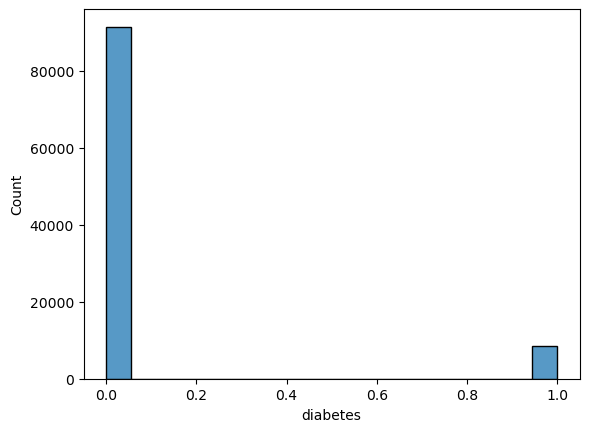

In [9]:
sns.histplot(x = 'diabetes', data = data_row)

In [10]:
data_row['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [11]:
data_row['diabetes'].value_counts()[0] / (data_row['diabetes'].value_counts()[0] + data_row['diabetes'].value_counts()[1]) * 100

91.5

In [12]:
100-data_row['diabetes'].value_counts()[0] / (data_row['diabetes'].value_counts()[0] + data_row['diabetes'].value_counts()[1]) * 100

8.5

Соотношение людей с диабетом и без дибаета:
Людей без диабета (0): 91500 (91,5%)
Людей больных диабетом (1): 8500 (8,5%)

2.2. Вычислим основные статистические характеристики

data_row.describe(): возвращает следующие статистические характеристики по каждому столбцу:

mean - среднее значение (M - мат ожидание - среднее значение, которое принимает случайная величина),

std - стандартное отклонение, корень из дисперсии (мера разброса значений случайной величины относительно её математического ожидания),

min - минимум,

25% - нижнее значение первого квантиля,

50% - медиана (такое число, что вероятность получить значение случайной величины справа от него равна вероятности получить значение слева от него, и они обе равны 1/2),

75% - верхнее значение первого квантиля

max - максимум

In [13]:
data_row.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Из max (максимальное значение) подозрения на выбросы имеют следующие показатели:

BMI - индекс массы тела,

blood_glucose_level	 - уровень глюкозы.


2.3. Рассмотрим все парные и индивидуальные распределения (sns.pairplot):

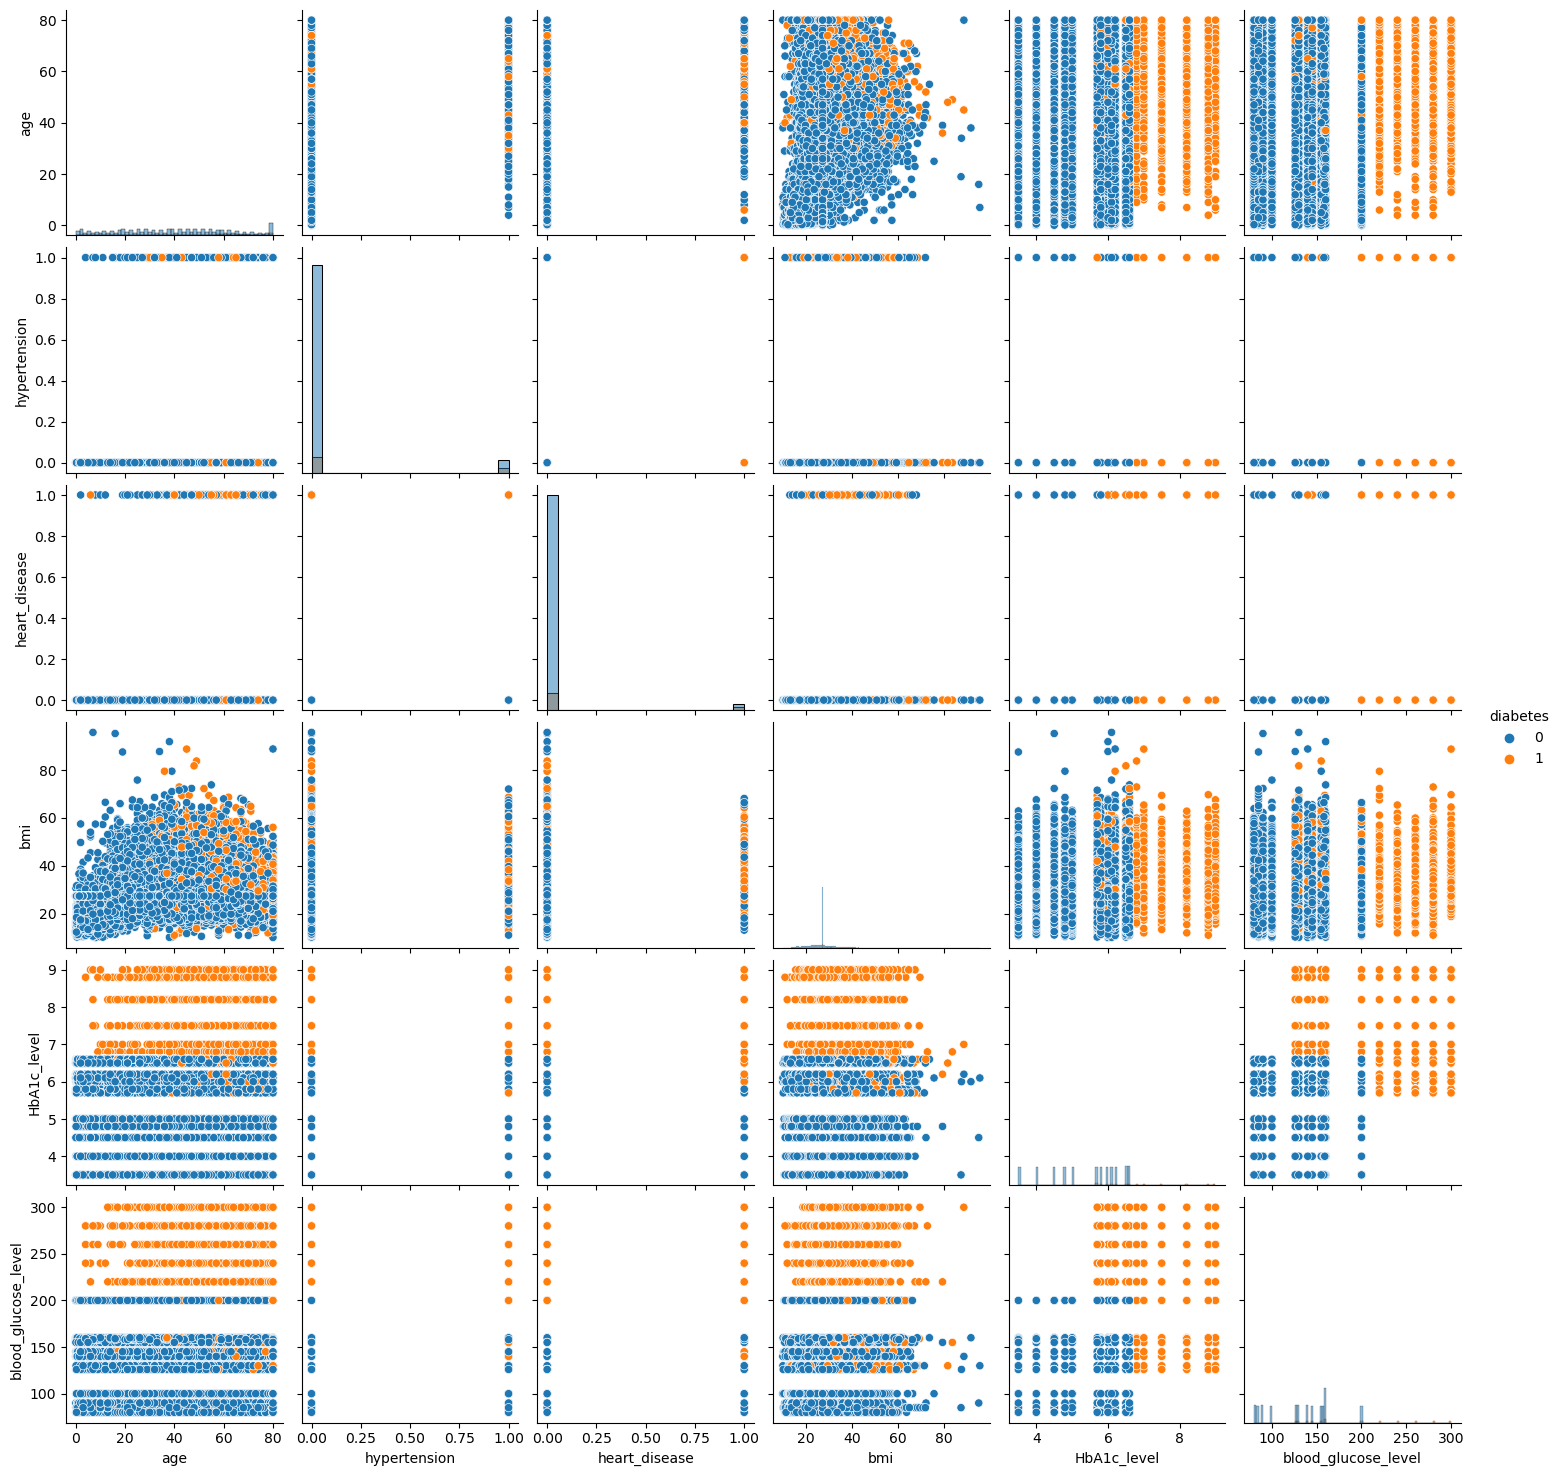

In [18]:
sns.pairplot(data = data_row, hue ='diabetes', diag_kind ='hist')

Почти для каждого признака видны границы, где человек начинает болеть диабетом. Можно заметить что с люди с большим уровнем глюкозы чаще подвержены диабету, а так же люди с высоким показателем гемоглобина


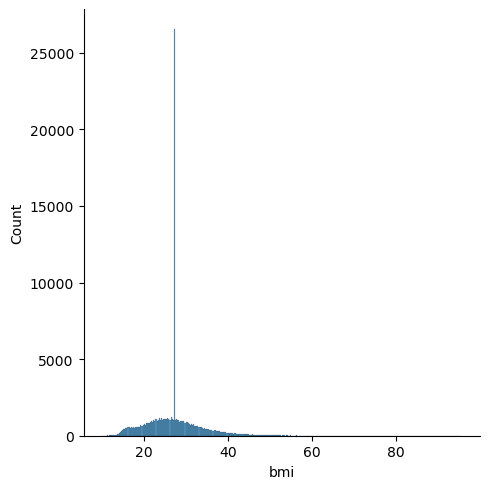

In [19]:
sns.displot(data_row["bmi"])

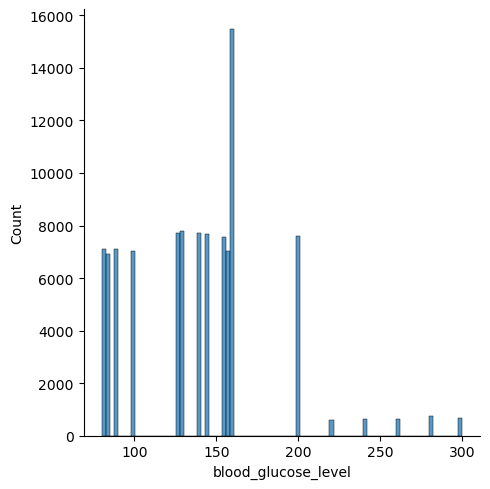

In [20]:
sns.displot(data_row["blood_glucose_level"])

Выбросов не обнаружено, все показатели в пределах нормы

Построим корреляционную матрицу:

In [22]:
data_row.shape
corr_mat = data_row.corr()

corr_mat

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


2.5.2. Построим тепловую карту Heatmap

<AxesSubplot:>

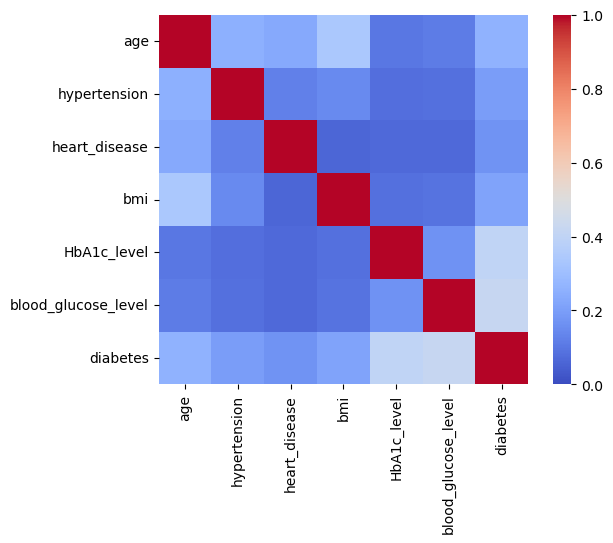

In [23]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin = 0.0)

Значение корреляции не превышает 0.5, скорее всего мультиколлинеарности нет, а переменные не имеют сильной линейной зависимости друг с другом. Так же не удалось найти зависимость диагноща только от одного признака

In [24]:
corr_mat = data_row.corr()
corr_mat["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

Наибольшую зависимость диабет имеет от уровня в крови глюкозы, гемоглобина и возраста человека

# 3. Обработка пропущенных значений

In [25]:
data_row.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Пропущенные значения отсутствуют

# 4. Обработка категориальных признаков

In [26]:
data_row['gender'] = data_row['gender'].astype('category')
data_row['smoking_history'] = data_row['smoking_history'].astype('category')


In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(data_row[['gender', 'smoking_history']])

OneHotEncoder(drop='if_binary', sparse=False)

In [30]:
dummies = pd.DataFrame(enc.transform(data_row[['gender', 'smoking_history']]),
                       columns=enc.get_feature_names_out(), index=data_row.index)
dummies.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
data_row = pd.concat((data_row, dummies), axis=1).drop(['gender', 'smoking_history'], axis=1)

In [32]:
data_row.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 5. Нормализация данных

Не требуется. Данные не имеют серьёзных различий между собой, так же некоторую часть составляют бинарные данные, которые не нуждаются в нормализации

# Разбиение данных на обучающую и тестовую выборку

Запишем в Х: все данные без diabetes (столбца с результатом, есть ли у человека диабет/ или нет)
Запишем в Y Diabetes (столбец резульата): есть ли у человека диабет/ нет

In [33]:
X = data_row.drop(["diabetes"], axis=1)
Y = data_row["diabetes"]

In [34]:
Y


0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [35]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,0,0,17.37,6.5,100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,66.0,0,0,27.83,5.7,155,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,24.0,0,0,35.42,4.0,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [36]:
N_train = int(data_row.shape[0] * 0.75)
N_train

75000

In [37]:
N_test = (data_row.shape[0] - N_train)

N_test

25000

Элементов в обучающей выборке: 73947
Элементов в тестовой выборке: 24650

train_test_split(...): Разобъем на обучающую и тестовую выборку:

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = N_train, test_size = N_test, stratify = Y, random_state = 42)

Выведем: обучауюущую выборку


In [39]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
98078,13.00,0,0,27.32,4.0,155,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
84833,0.88,0,0,15.20,6.6,80,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50495,5.00,0,0,17.80,6.1,200,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9896,80.00,0,0,30.28,6.1,145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40910,15.00,0,0,12.62,6.6,90,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17083,39.00,0,0,32.28,4.8,130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27250,43.00,0,0,27.32,6.2,158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33409,52.00,1,0,27.32,5.8,155,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
91639,5.00,0,0,15.68,6.2,155,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
Y_train

98078    0
84833    0
50495    0
9896     1
40910    0
        ..
17083    0
27250    0
33409    0
91639    0
80678    0
Name: diabetes, Length: 75000, dtype: int64

Выведем: Тестовую выборку

In [41]:
X_test

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
26761,15.0,0,0,19.84,6.5,140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17616,41.0,0,0,27.32,5.7,100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5713,6.0,0,0,21.30,6.6,80,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
76456,45.0,0,0,29.20,4.8,126,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
79467,80.0,0,0,30.86,6.2,130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,39.0,0,0,27.32,4.8,126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
73916,27.0,0,0,27.32,5.7,90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5550,80.0,0,1,27.80,8.8,145,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53401,66.0,0,1,25.32,6.5,90,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
Y_test

26761    0
17616    0
5713     0
76456    0
79467    0
        ..
9316     0
73916    0
5550     1
53401    0
35908    0
Name: diabetes, Length: 25000, dtype: int64

Узнаем, сколько:
На тестовой выборке, людей без заболевания диабетом (0): ?
На тестовой выборке, людей с диабетом (1): ?

In [43]:
Y_test.value_counts()

0    22875
1     2125
Name: diabetes, dtype: int64

На обучающей выборке данных: 24650

На тестовой выборке, людей без заболевания диабетом (0): 22875

На тестовой выборке, людей с диабетом (1): 2125

In [44]:
Y_train.value_counts()

0    68625
1     6375
Name: diabetes, dtype: int64

На обучающей выборке данных: 73947

На обучающей выборке, людей без заболевания диабетом (0): 68625

На обучающей выборке, людей с диабетом (1): 6375

# 7. Классификатор ближайших соседей (попробовать разное их количество)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print(best_n_neighbors)

C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\linka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# 8. Вычисление ошибок на обучающей и тестовой выборках. Выводы.

In [ ]:
knn = KNeighborsClassifier(17).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

In [ ]:
plot_confusion_matrix(knn, X_test, Y_test, cmap = plt.cm.Blues)